In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('artifacts/sentiment_analysis.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


#Data preprocessing

In [5]:
data.shape

(7920, 3)

In [6]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text preprocessing

In [9]:
import re
import string

In [10]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [11]:
#convert uppercase to lowercase
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [13]:
#remove link
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [14]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [15]:
#remove punctuations
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punc(text):
    for punc in string.punctuation:
        text = text.replace(punc, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punc)

In [17]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [18]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [19]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

## Remove numbers

In [20]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

## Remove Stopwords

In [21]:
!pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/42.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 288.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 991.0 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 919.0 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 819.2 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 853.3 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.5 MB 876.1 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 811.5 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 886.2 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 895.6 kB/s eta 0:0

In [23]:
import nltk
nltk.download('stopwords', download_dir='static/model')

[nltk_data] Downloading package stopwords to static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
with open('static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [27]:
sw


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [30]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

## Stemming

In [31]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [32]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [33]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [35]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## Building Vocabulary

In [36]:
from collections import Counter
vocab = Counter()

In [37]:
vocab

Counter()

In [38]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [39]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [40]:
len(vocab)

15949

In [41]:
tokens = [key for key in vocab if vocab[key] > 10]

In [42]:
len(tokens)

1145

In [43]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, 'static/model/vocabulary.txt')

## Divide dataset

In [48]:
X = data['tweet']
Y = data['label']

In [49]:
X


0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [50]:
Y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [51]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 890.4 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 890.4 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 358.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 991.0 kB/s eta 0:00:11
   ---------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:11
   ---------------------------------------- 0.1/10.6 MB 901.1 kB/s eta 0:00:12
    --------------------------------------- 0.2/10.6 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.2/10.6 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.3/10.6 MB 1.0 MB/s eta 0:00:10
   - -------------------------------------- 0.3/10.6 MB 1.0 MB/s eta 0:00:11
  

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [53]:
X_train

5916    pretti sure iphon fuck keep vibrat constantli ...
4455     ps know dirti secret soni live demo pc ps pssuck
3419    nice game theparallax game app iphon amaz hype...
3652    also wolfgangwolf go fuck say one goddamn fuck...
2314    who feel metal inlay classic wood case silvera...
                              ...                        
5712    iphon spoof taller chang expect … weareallindi...
6070    charltonbrook iron cant watch ur ipad video mo...
1995    feel free chile tourism natur freedom sky ipho...
5882    gilmor girl reviv yup luke… news photographi f...
3479    grumpi princess cute neko kitti cat popular ip...
Name: tweet, Length: 6336, dtype: object

In [54]:
Y_train

5916    1
4455    1
3419    0
3652    1
2314    0
       ..
5712    1
6070    0
1995    0
5882    0
3479    0
Name: label, Length: 6336, dtype: int64

In [55]:
X_test

6470    let handfold puzzl bit remot job saa join inst...
258     conveni iphon stop work complet less month war...
2665    santa clau come town mean appl travel … pictwi...
4435    smile iphonesia iphon instagood instagram phot...
732     hate appl product everyth stand yall fuck tras...
                              ...                        
2285    realli wish phone would sync comput im get rea...
1376    hateappl rt mashabl next gener iphon iphon rec...
2484    appl iphon gb factori unlock appl inc … want n...
6313    gain follow rt must follow follow back follow ...
1253    michel came home tcot nascar theater movi sing...
Name: tweet, Length: 1584, dtype: object

In [56]:
Y_test

6470    0
258     1
2665    0
4435    0
732     1
       ..
2285    1
1376    1
2484    0
6313    0
1253    0
Name: label, Length: 1584, dtype: int64

## Vectorization

In [57]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [62]:
vectorized_X_train = vectorizer(X_train, tokens)

In [65]:
for i in vectorized_X_train[0]:
    print(i)

0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0


In [66]:
vectorized_X_test = vectorizer(X_test, tokens)

In [67]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:

Y_train.value_counts()

label
0    4730
1    1606
Name: count, dtype: int64

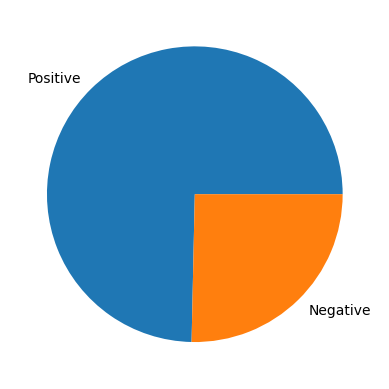

In [70]:
plt.pie(np.array([Y_train.value_counts()[0], Y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## Handle imbalanced dataset

In [71]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/257.7 kB 1.4 MB/s eta 0:00:01
   ------------ -------------------------- 81.9/257.7 kB 919.0 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/257.7 kB 819.2 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/257.7 kB 984.6 kB/s eta 0:00:01
   ---------------------------- --------- 194.6/257.7 kB 908.0 kB/s eta 0:00:01
   -------------------------------------  256.0/257.7 kB 983.0 kB/s eta 0:00:01
   -------------------------------------  256.0/257.7 kB 983.0 kB/s eta 0:00:01
   -------------------------------------- 257.7/257.7 kB 754.3 kB/s eta 0:00:00


In [73]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_X_train_smote, Y_train_smote = smote.fit_resample(vectorized_X_train, Y_train)
print(vectorized_X_train_smote.shape, Y_train_smote.shape)

C:\Users\waris\Desktop\Identify_semtiments\env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\waris\Desktop\Identify_semtiments\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


(9460, 1145) (9460,)


In [75]:
Y_train_smote.value_counts()

label
1    4730
0    4730
Name: count, dtype: int64

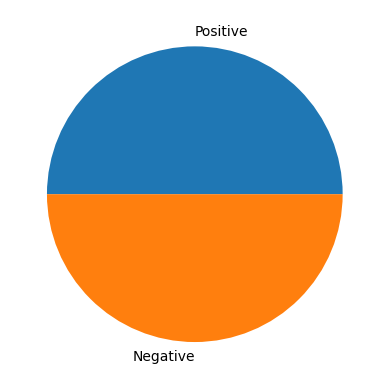

In [77]:
plt.pie(np.array([Y_train_smote.value_counts()[0], Y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [79]:
vectorized_X_train_smote

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [80]:
Y_train_smote

0       1
1       1
2       0
3       1
4       0
       ..
9455    1
9456    1
9457    1
9458    1
9459    1
Name: label, Length: 9460, dtype: int64

In [81]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [82]:
Y_test

6470    0
258     1
2665    0
4435    0
732     1
       ..
2285    1
1376    1
2484    0
6313    0
1253    0
Name: label, Length: 1584, dtype: int64

## Model Building and Evaluation

In [83]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [84]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [86]:
lr = LogisticRegression()
lr.fit(vectorized_X_train_smote, Y_train_smote)

Y_train_pred = lr.predict(vectorized_X_train_smote)

Y_test_pred = lr.predict(vectorized_X_test)

training_scores(Y_train_smote, Y_train_pred)

validation_scores(Y_test, Y_test_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.919
	Recall = 0.968
	F1-Score = 0.943
Testing Scores:
	Accuracy = 0.86
	Precision = 0.69
	Recall = 0.862
	F1-Score = 0.766


### Naive Bayes

In [87]:
mnb = MultinomialNB()
mnb.fit(vectorized_X_train_smote, Y_train_smote)

Y_train_pred = mnb.predict(vectorized_X_train_smote)

Y_test_pred = mnb.predict(vectorized_X_test)

training_scores(Y_train_smote, Y_train_pred)

validation_scores(Y_test, Y_test_pred)

Training Scores:
	Accuracy = 0.908
	Precision = 0.872
	Recall = 0.957
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.852
	Precision = 0.656
	Recall = 0.926
	F1-Score = 0.768


### Decision Tree

In [88]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_X_train_smote, Y_train_smote)

Y_train_pred = dt.predict(vectorized_X_train_smote)

Y_test_pred = dt.predict(vectorized_X_test)

training_scores(Y_train_smote, Y_train_pred)

validation_scores(Y_test, Y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.828
	Precision = 0.666
	Recall = 0.702
	F1-Score = 0.684


### Random Forest

In [89]:
rf = RandomForestClassifier()

rf.fit(vectorized_X_train_smote, Y_train_smote)

Y_train_pred = rf.predict(vectorized_X_train_smote)

Y_test_pred = rf.predict(vectorized_X_test)

training_scores(Y_train_smote, Y_train_pred)

validation_scores(Y_test, Y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.859
	Precision = 0.724
	Recall = 0.755
	F1-Score = 0.739


In [91]:
svm = SVC()

svm.fit(vectorized_X_train_smote, Y_train_smote)

Y_train_pred = svm.predict(vectorized_X_train_smote)

Y_test_pred = svm.predict(vectorized_X_test)

training_scores(Y_train_smote, Y_train_pred)

validation_scores(Y_test, Y_test_pred)

Training Scores:
	Accuracy = 0.98
	Precision = 0.964
	Recall = 0.997
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.87
	Precision = 0.721
	Recall = 0.831
	F1-Score = 0.772


In [92]:
import pickle

with open('static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)